# Demonstrating Pandas and data visualization using wine Reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
import matplotlib.patches as mpatches

### Import our wine reviews data set from csv file

In [2]:
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv')

In [4]:
# Let's have a look at the head of our wine list
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Question 1
Which variety has the best ratings (by means); which variety is the most and least expensive (by means)

In [27]:
# Group our wines by variety then get the mean of points per variety then sort.
variety_group = wine_reviews.groupby(['variety'])
avg_varieties = variety_group[['points']].mean().sort_values(by='points', ascending=False)
print(avg_varieties.head())

                    points
variety                   
Terrantez        95.000000
Tinta del Pais   95.000000
Gelber Traminer  95.000000
Bual             94.142857
Sercial          94.000000


In [28]:
mean_variety_prices = variety_group[['price']].mean().sort_values(by='price', ascending=False)

In [30]:
# Not all varieties have prices so we would like to remove the missing values

In [31]:
mean_variety_prices.tail()

,price
variety,
Roscetto,NaN
Sauvignon Blanc-Sauvignon Gris,NaN
Tempranillo-Malbec,NaN
Vital,NaN
Zelen,NaN


In [33]:
mean_variety_prices = mean_variety_prices.dropna()
mean_variety_prices.tail()

,price
variety,
Johannisberg Riesling,8.875
Shiraz-Tempranillo,8.500
Malagouzia-Chardonnay,8.000
Macabeo-Moscatel,8.000
Trajadura,7.000


In [40]:
## Highest price is in the first index because data 
#is already sorted and lowest at bottom
highest_variety_price, lowest_variety_price = mean_variety_prices.iloc[0], mean_variety_prices.iloc[-1]
print(str(highest_variety_price))
print(">>>>>>>>>>>>>>>>>")
print(lowest_variety_price)

price    495.0
Name: Ramisco, dtype: float64
>>>>>>>>>>>>>>>>>
price    7.0
Name: Trajadura, dtype: float64


### Question 2
Find out the means of price for each country’s wine and plot the means


In [22]:
## Let's first use a group by to group reviews by country then find the mean price
mean_price_by_country = wine_reviews.groupby('country')[['price']].mean()
mean_price_by_country.head()

,price
country,
Argentina,24.510117
Armenia,14.500000
Australia,35.437663
Austria,30.762772
Bosnia and Herzegovina,12.500000


Text(0.5, 1.0, 'Mean Price of wines by country')

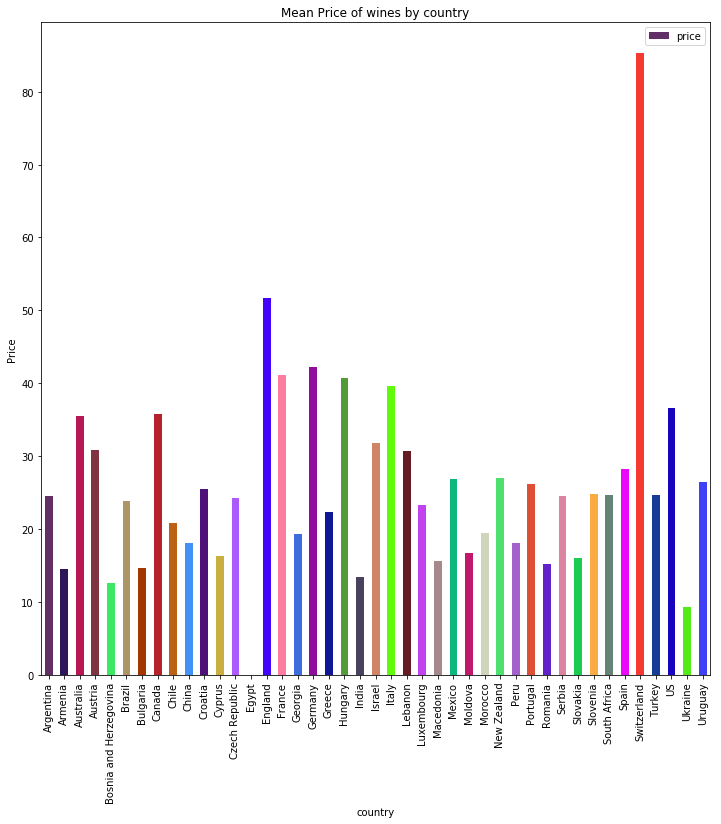

In [23]:
# Generate random colors using numpy
colors = np.random.sample([len(mean_price_by_country),3])
mean_plot = mean_price_by_country.plot.bar(figsize=(12,12), color=[colors])
mean_plot.set_ylabel('Price')
mean_plot.set_title('Mean Price of wines by country')

In [54]:
len(mean_price_by_country)

43

## Question 3
Find out the mean of wine points for each variety grouped by province and list the best rated wine variety for each province

In [25]:
## Our first solution was to group by province then find the max ids of our points
## and place it back into our dataframe but this was slow
b = wine_reviews.groupby(['province','variety'], as_index=False).points.mean()
b.loc[b.groupby('province').points.idxmax()]

,province,variety,points
2,Achaia,Rosé,90.000000
5,Aconcagua Costa,Carmenère,90.000000
10,Aconcagua Valley,Bordeaux-style Red Blend,91.800000
28,Aegean,Okuzgozu,92.000000
35,Agioritikos,Red Blend,87.000000
39,Ahr,Spätburgunder,91.000000
40,Alenquer,Portuguese Red,87.666667
48,Alentejano,Arinto,91.000000
80,Alentejo,Touriga Nacional,93.000000
83,Alenteo,Portuguese White,88.000000


In [28]:
# Here is a one line solution that runs faster and looks oh so beautiful
# We first group by province and variety then get the means of the points 
# in our current hierchy group. followed by a call to reset index to turn 
# or group back into a dataframe which gives us the ability to sort
(wine_reviews.groupby(['province','variety'])
    .points.mean()
    .reset_index()
    .sort_values(['province','points'], ascending=[1,0])
    .groupby('province').head(1))

,province,variety,points
2,Achaia,Rosé,90.000000
5,Aconcagua Costa,Carmenère,90.000000
10,Aconcagua Valley,Bordeaux-style Red Blend,91.800000
28,Aegean,Okuzgozu,92.000000
35,Agioritikos,Red Blend,87.000000
39,Ahr,Spätburgunder,91.000000
40,Alenquer,Portuguese Red,87.666667
48,Alentejano,Arinto,91.000000
80,Alentejo,Touriga Nacional,93.000000
83,Alenteo,Portuguese White,88.000000


### The length of unique province names did not match by one and by using set operators we can see the missing column was nan

In [29]:
all_prov = set(wine_reviews.province.unique().tolist())

In [30]:
most_prov = set(wine_reviews.groupby(['province'])['points'].max().index.tolist())

In [31]:
all_prov - most_prov

{nan}

## Question 4
Scatter plot the mean of wine points for each variety and adjust the size of the bubble by the mean price of that variety (the most expensive the bigger the bubble), add colors

In [100]:
import math

In [107]:
## Get rid of deceminals
mean__values = mean_variety_prices['price'].astype(float).apply(math.ceil).values

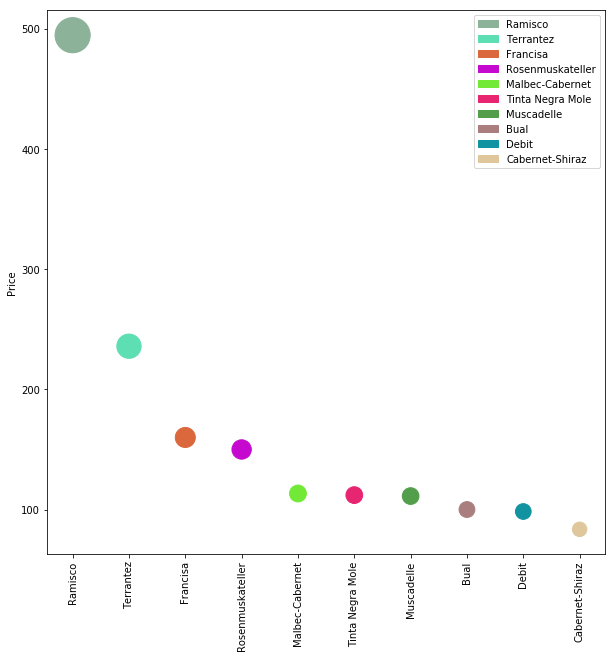

In [740]:
# mean_variety_prices[['price']].plot.scatter(x='price', y=mean_variety_prices.index)
# we are only plotting 10 unless our graph will look hideous
colors = np.random.sample((10,3))
plt.figure(figsize=(10,10))
ax = plt.scatter(mean_variety_prices.index[:10], mean_variety_prices[['price']].values[:10], s=mean_variety_prices[['price']].values[:10] *2.5, c=colors)
plt.xticks( rotation='vertical')
plt.ylabel('Price')
plt.legend(handles=create_labels(colors, mean_variety_prices.index[:10]))
plt.show()

## Question 5
If you want to open a winery in California and you want to stock 5 best rated wines under $50, which 5 wines will you choose? Show the wines’ ID (first column), description, region1 and variety

In [41]:
# We can use this function as a one line but I realized that it was slow and inneficient
# We can use an apply function on all of our rows finding the ones name california and price under 50 then sort those values
# But running so many checks on rows makes it slower than the more verbose approach
(wine_reviews[wine_reviews.apply(lambda df: df.province == "California" and df.price < 50, axis=1)]
 .sort_values(by='points', ascending=False)).iloc[:5][['title', 'description', 'region_1', 'variety', 'price']]

,title,description,region_1,variety,price
118059,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,"Shows classic, full-throttle notes of tropical...",Sonoma Coast,Chardonnay,44.0
114981,Donkey & Goat 2010 Fenaughty Vineyard Syrah (E...,A seriously top of the heap California Syrah. ...,El Dorado,Syrah,35.0
15851,Stolo 2014 Estate Syrah (San Luis Obispo County),This is possibly the most savory rendition of ...,San Luis Obispo County,Syrah,40.0
26892,Iron Horse 2012 Wedding Cuvée Estate Bottled S...,An offering meant to toast all manner of celeb...,Green Valley,Sparkling Blend,44.0
34505,Williams Selyem 2007 Late Harvest Muscat (Russ...,"The winery's philosophy is, if you're going to...",Russian River Valley,Muscat,40.0


In [42]:
# This is our more verbose approach

In [33]:
california_wines = wine_reviews[wine_reviews.province == 'California']

In [34]:
california_cheap_wines = california_wines[california_wines.price < 50]

In [35]:
cheap_wine_by_points = california_cheap_wines.sort_values(by='points', ascending=False).iloc[:5]

In [36]:
cheap_wine_by_points[['title', 'description', 'region_1', 'variety', 'price']]

,title,description,region_1,variety,price
118059,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,"Shows classic, full-throttle notes of tropical...",Sonoma Coast,Chardonnay,44.0
114981,Donkey & Goat 2010 Fenaughty Vineyard Syrah (E...,A seriously top of the heap California Syrah. ...,El Dorado,Syrah,35.0
15851,Stolo 2014 Estate Syrah (San Luis Obispo County),This is possibly the most savory rendition of ...,San Luis Obispo County,Syrah,40.0
26892,Iron Horse 2012 Wedding Cuvée Estate Bottled S...,An offering meant to toast all manner of celeb...,Green Valley,Sparkling Blend,44.0
34505,Williams Selyem 2007 Late Harvest Muscat (Russ...,"The winery's philosophy is, if you're going to...",Russian River Valley,Muscat,40.0


# Questions 6
Histogram of the ratings of wine

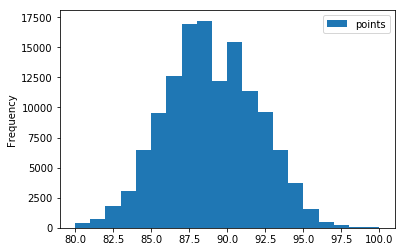

In [43]:
wine_reviews[['points']].plot.hist(bins=20)

# Question 7
Bar plot of the average scores grouped by wine type

In [150]:
# Group wines by variety  then sort by points
variety_group = wine_reviews.groupby(['variety'])
avg_varieties = variety_group[['points']].mean().sort_values(by='points', ascending=False)
print(avg_varieties.head())

                    points
variety                   
Terrantez        95.000000
Tinta del Pais   95.000000
Gelber Traminer  95.000000
Bual             94.142857
Sercial          94.000000


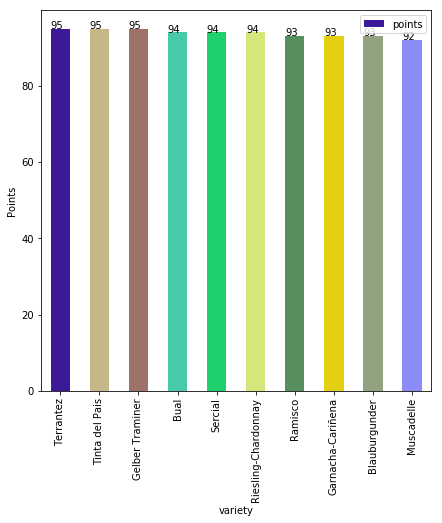

In [167]:
# generate colors for our plot and only plot 10
colors = np.random.sample([10,3])
ax = avg_varieties[:10].astype('int').plot.bar(figsize=(7,7), color=[colors])
ax.set_ylabel('Points')
# Add annotations so we can see individual scores
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.00))

# Question 8
Scatter plot showing mean scores of wine type and prices. Use number of reviews as the size of circles
Only use wines whose number of reviews were above 500 and price above 50

In [46]:
variety_group = wine_reviews.groupby(['variety'])
avg_varieties = variety_group[['points']].mean()
number_of_reviews = wine_reviews['variety'].value_counts()

In [47]:
number_of_reviews.head()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Name: variety, dtype: int64

In [48]:
avg_varieties.head()

,points
variety,
Abouriou,87.666667
Agiorgitiko,87.031746
Aglianico,89.275766
Aidani,82.000000
Airen,81.666667


In [49]:
# Use agregation to group our avg_points avg_price and number of reviews
columns = {'variety':'num_reviews', 'points':'avg_points', 'price':'avg_price'}
wine_big_group = wine_reviews.groupby(['variety']).agg({'variety':'count','points':'mean', 'price':'mean'}).rename(columns=columns)

In [50]:
wine_big_group.sort_values(by='avg_price', ascending=False).head()

,num_reviews,avg_points,avg_price
variety,,,
Ramisco,1,93.000000,495.000000
Terrantez,1,95.000000,236.000000
Francisa,1,91.000000,160.000000
Rosenmuskateller,2,92.500000,150.000000
Malbec-Cabernet,3,91.666667,113.333333


### Only one person reviewed the most expensive wine not surprised

In [54]:
wines_over_under = wine_big_group[(wine_big_group.num_reviews > 500) & (wine_big_group.avg_price > 50)]

In [57]:
wines_over_under

,num_reviews,avg_points,avg_price
variety,,,
Champagne Blend,1396,89.663324,70.744839
Nebbiolo,2804,90.251070,65.609610
Port,668,89.733533,64.679359
Sangiovese Grosso,751,90.529960,65.634975


In [58]:
# we want to have access to the variety as a column instead of an index so we
# use reset_index and do it inplace
wines_over_under.reset_index(inplace=True)

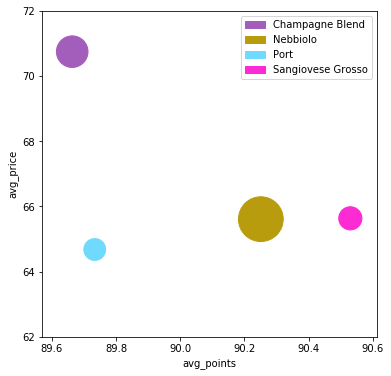

In [87]:
c = np.random.sample([len(wines_over_under), 3])
l = wines_over_under.variety.values
ax = wines_over_under.plot.scatter(x='avg_points', y='avg_price', s=wines_over_under['num_reviews']/1.4, color=c, ylim=(62,72), figsize=(6,6))
ax.legend(handles=create_labels(colors=c,labels=wines_over_under.variety.to_list()))
plt.savefig('Most_Reviewed_Wines_50_and_up.jpeg')

# Question 9
Pie chart showing type of wine by percentage reviewed

In [89]:
# First divide the value counts of our wine by total wine reviews to get our percentages
percentage_type_wine = wine_reviews.variety.value_counts() / len(wine_reviews)

In [90]:
percentage_type_wine = percentage_type_wine.sort_values(ascending=False) * 100

In [102]:
# Let us only take the highest percentage
percentage_type_wine.iloc[:10].sum()

54.87531834024514

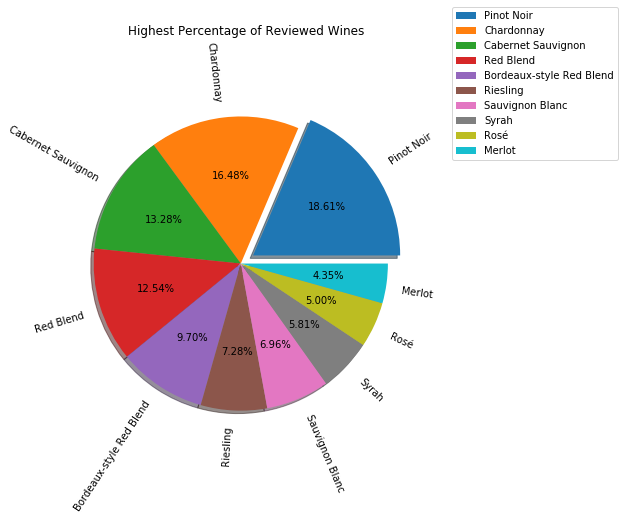

In [105]:
# This graph only displays the top 10 highest percentage used wines which represents 54.87% and 
#we get to see which are used most among them
explode = [0] * 10
explode[0] = 0.1
ax = percentage_type_wine.iloc[:10].plot.pie(rotatelabels=True, autopct='%1.2f%%', figsize=(6,6),explode=explode, shadow=True)

ax.set_ylabel('')
ax.axis('equal')
ax.set_title('Highest Percentage of Reviewed Wines', y=1.18)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 1.05))
plt.show()

In [292]:
# Making
percentage_type_wine

Pinot Noir                    10.211509
Chardonnay                     9.042786
Cabernet Sauvignon             7.287780
Red Blend                      6.883074
Bordeaux-style Red Blend       5.320418
Riesling                       3.992429
Sauvignon Blanc                3.821622
Syrah                          3.186865
Rosé                           2.742150
Merlot                         2.386686
Nebbiolo                       2.157404
Zinfandel                      2.088158
Sangiovese                     2.082772
Malbec                         2.040455
Portuguese Red                 1.897346
White Blend                    1.815790
Sparkling Blend                1.656523
Tempranillo                    1.392618
Rhône-style Red Blend          1.131791
Pinot Gris                     1.119480
Champagne Blend                1.074086
Cabernet Franc                 1.041001
Grüner Veltliner               1.034846
Portuguese White               0.891737
Bordeaux-style White Blend     0.820183


# Question 10
Who reviewed the most wine?

In [106]:
# Simple oneliner
wine_reviews.taster_name.value_counts().sort_values(ascending=False).head(1)

Roger Voss    25514
Name: taster_name, dtype: int64

# Question 11
Top 10 wine reviewers by twitter handle.

In [107]:
# Our 10 best reviewers by twitter handle
wine_reviews.taster_twitter_handle.value_counts().sort_values(ascending=False).head(10)

@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
Name: taster_twitter_handle, dtype: int64

# Question 12
Average price of wine by country

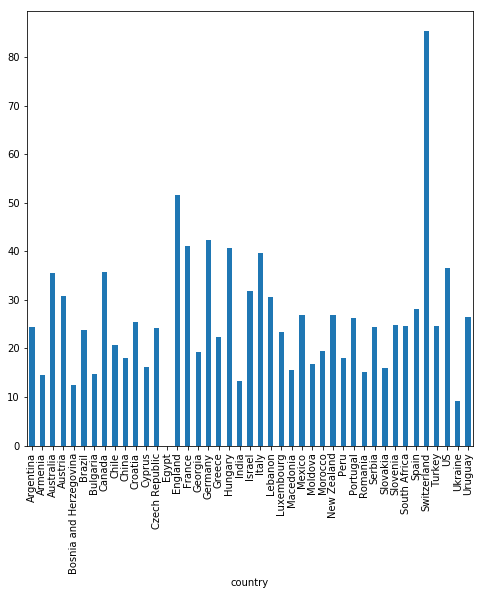

In [312]:
wine_reviews.groupby('country').price.mean().plot.bar(figsize=(8,8))

# Question 13
Which Variety of grape was mostly used.. use a bar plot

In [108]:
# Add utility functions to style or graphs better
def create_labels(colors, labels):
    handles = []
    for color, label in zip(colors, labels):
        handles.append(mpatches.Patch(color=color, label=label))
    return handles
    

In [109]:
def add_annotations(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * .99, p.get_height() * 1.01))
    

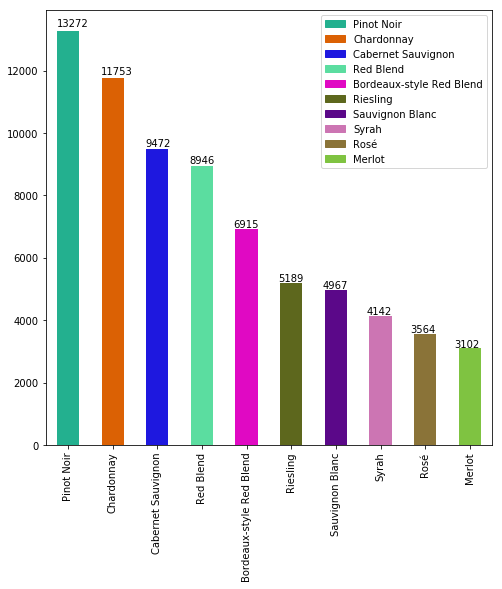

In [111]:
colors = np.random.sample([10,3])
labels = wine_reviews.variety.value_counts().sort_values()[:-11:-1].index
ax = wine_reviews.variety.value_counts().sort_values()[:-11:-1].plot.bar(figsize=(8,8), color=colors)
add_annotations(ax)
ax.legend(handles=create_labels(colors,labels))


# Extra Credit Plot a World Map of our wines and mean price

In [8]:
# we first import pygal
import pygal
from pygal.maps.world import COUNTRIES

In [437]:
# special pygal dictionary storing our country codes
COUNTRIES

{'ad': 'Andorra',
 'ae': 'United Arab Emirates',
 'af': 'Afghanistan',
 'al': 'Albania',
 'am': 'Armenia',
 'ao': 'Angola',
 'aq': 'Antarctica',
 'ar': 'Argentina',
 'at': 'Austria',
 'au': 'Australia',
 'az': 'Azerbaijan',
 'ba': 'Bosnia and Herzegovina',
 'bd': 'Bangladesh',
 'be': 'Belgium',
 'bf': 'Burkina Faso',
 'bg': 'Bulgaria',
 'bh': 'Bahrain',
 'bi': 'Burundi',
 'bj': 'Benin',
 'bn': 'Brunei Darussalam',
 'bo': 'Bolivia, Plurinational State of',
 'br': 'Brazil',
 'bt': 'Bhutan',
 'bw': 'Botswana',
 'by': 'Belarus',
 'bz': 'Belize',
 'ca': 'Canada',
 'cd': 'Congo, the Democratic Republic of the',
 'cf': 'Central African Republic',
 'cg': 'Congo',
 'ch': 'Switzerland',
 'ci': "Cote d'Ivoire",
 'cl': 'Chile',
 'cm': 'Cameroon',
 'cn': 'China',
 'co': 'Colombia',
 'cr': 'Costa Rica',
 'cu': 'Cuba',
 'cv': 'Cape Verde',
 'cy': 'Cyprus',
 'cz': 'Czech Republic',
 'de': 'Germany',
 'dj': 'Djibouti',
 'dk': 'Denmark',
 'do': 'Dominican Republic',
 'dz': 'Algeria',
 'ec': 'Ecuador',
 

In [112]:
# create a df grouped by country and find the mean price of the countries
countries_avg_price = wine_reviews.groupby('country').price.mean()

In [445]:
# crate a dictionary and cycle through countries_avg_price for country and price
countries = {}
for country,price in countries_avg_price.iteritems():
    if math.isnan(price):
        continue
    code = get_country_code(country)
    if code:
        countries[code] = price

In [11]:
# Second way which gives us the option to make our country into a label
countries = {}
for country,price in countries_avg_price.iteritems():
    if math.isnan(price):
        continue
    code = get_country_code(country)
    if code:
        countries[country] = {code:price}

In [12]:
import math

In [13]:
# create map
wm = pygal.maps.world.World()

In [14]:
# Add title to map
wm.title = "Average Price of Wines by Country"

OSError: dlopen() failed to load a library: cairo / cairo-2 / cairo-gobject-2 / cairo.so.2

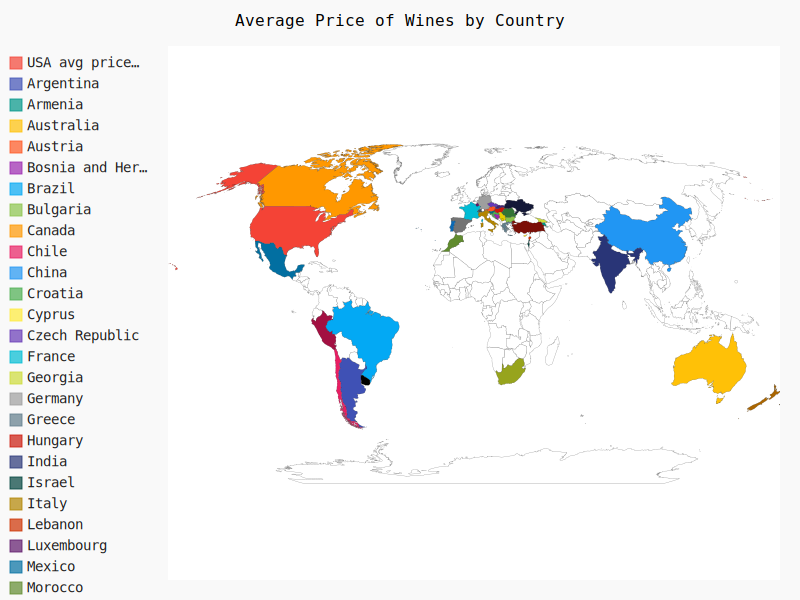

In [15]:
wm.add('USA  avg price of wine'+ str(countries_avg_price['US']),{'us':countries_avg_price['US']} )
for country_name, country_data in countries.items():
    
    wm.add(country_name, country_data)
wm

In [16]:
wm.render_to_file('world4.svg')
print(5)

5


In [440]:
wine_reviews[wine_reviews.country == 'Egypt']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
110246,110246,Egypt,"Ripe pear, apple and tropical fruit in the nos...",Caspar Blanc de Noirs,84,NaN,Egypt,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Sahara Vineyards 2008 Caspar Blanc de Noirs Gr...,Grenache,Sahara Vineyards


In [17]:
from IPython.display import SVG, display

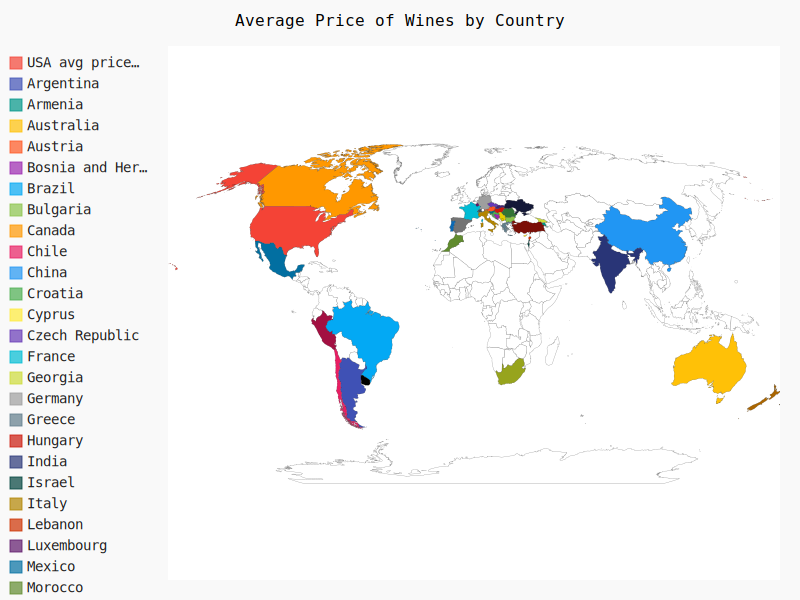

In [18]:
display(SVG(filename='world4.svg'))

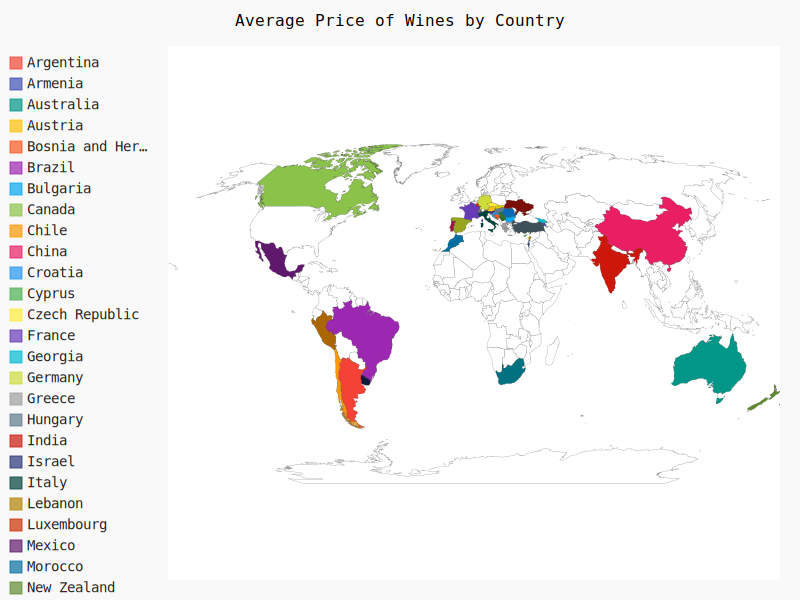

In [630]:
%%timeit
wine_reviews.groupby(['province', 'variety'], as_index=False).points.mean().sort_values(['province', 'points'], ascending=[1,0]).groupby('province').head(1) #.groupby(level=0).head(1)

45.7 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [636]:
%%timeit
b = wine_reviews.groupby(['province','variety'], as_index=False).points.mean()
b.loc[b.groupby('province').points.idxmax()]

164 ms ± 4.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [671]:
(wine_reviews.groupby(['province','variety'], as_index=False)
    .points.mean()
    .sort_values(['province','points'], ascending=[1,0])
    .groupby('province').head(1))

,province,variety,points
2,Achaia,Rosé,90.000000
5,Aconcagua Costa,Carmenère,90.000000
10,Aconcagua Valley,Bordeaux-style Red Blend,91.800000
28,Aegean,Okuzgozu,92.000000
35,Agioritikos,Red Blend,87.000000
39,Ahr,Spätburgunder,91.000000
40,Alenquer,Portuguese Red,87.666667
48,Alentejano,Arinto,91.000000
80,Alentejo,Touriga Nacional,93.000000
83,Alenteo,Portuguese White,88.000000


In [650]:
x=wine_reviews.groupby(['province', 'variety']).points.mean()
x_df = x.unstack()
x_df.agg(["max", "idxmax"], axis=1)

,max,idxmax
Achaia,90,Rosé
Aconcagua Costa,90,Carmenère
Aconcagua Valley,91.8,Bordeaux-style Red Blend
Aegean,92,Okuzgozu
Agioritikos,87,Red Blend
Ahr,91,Spätburgunder
Alenquer,87.6667,Portuguese Red
Alentejano,91,White Blend
Alentejo,93,Touriga Nacional
Alenteo,88,Portuguese White


In [669]:
%%timeit
wine_reviews.groupby(['province'], as_index=False).points.sum().sort_values('points', ascending=False)

14.5 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [670]:
%%timeit
wine_reviews.groupby(['province']).points.sum().reset_index().sort_values('points', ascending=False)

13.6 ms ± 88.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
